In [15]:
%matplotlib inline
%matplotlib notebook
from IPython.display import display
import ipywidgets as widgets
import seaborn as sns
from ipywidgets import interact
# from scripts.vis import draw
from py2neo import Node
import neo4jupyter
neo4jupyter.init_notebook_mode()
import py2neo
from py2neo import Graph
import os
import numpy as np
import glob
from os import listdir
from neo4j.v1 import GraphDatabase
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz

<IPython.core.display.Javascript object>

In [16]:
#connect to graph database
my_graph = Graph('http://localhost:7474/')

In [19]:
ingredient_query="""MATCH (i:ingredient) return i.name limit 100"""
ingredient_list = list(my_graph.run(ingredient_query).data())
options = {"component": "name", "ingredient": "name"}
# options = {"component": "name", "ingredient": "name"}

In [4]:
@interact(ingredient = ingredient_list)
def plot(ingredient):
    _ = neo4jupyter.draw(my_graph, options)

interactive(children=(Dropdown(description='ingredient', options=({'i.name': 'onion'}, {'i.name': 'milk'}, {'i.name': 'bulgur'}, {'i.name': 'tomato'}, {'i.name': 'black beans'}, {'i.name': 'quinoa'}, {'i.name': 'coconut milk'}, {'i.name': 'scallion'}, {'i.name': 'water'}, {'i.name': 'pear'}, {'i.name': 'banana'}, {'i.name': 'rice'}, {'i.name': 'beef'}, {'i.name': 'red peppers'}, {'i.name': 'celery'}, {'i.name': 'lemon'}, {'i.name': 'red onions'}, {'i.name': 'white vinegar'}, {'i.name': 'carrot'}, {'i.name': 'tahini'}, {'i.name': 'bell pepper'}, {'i.name': 'bay leaf'}, {'i.name': 'cumin'}, {'i.name': 'parsley'}, {'i.name': 'macaroni'}, {'i.name': 'cheese'}, {'i.name': 'garlic'}, {'i.name': 'sweet potatoes'}, {'i.name': 'sweet paprika'}, {'i.name': 'cayenne pepper'}), value={'i.name': 'onion'}), Output()), _dom_classes=('widget-interact',))

<IPython.core.display.Javascript object>


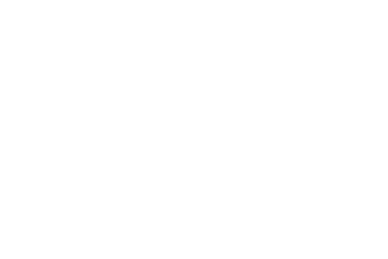

['_Figure__remove_ax',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alpha',
 '_animated',
 '_axobservers',
 '_axstack',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_contains',
 '_dpi',
 '_gci',
 '_get_axes',
 '_get_dpi',
 '_gid',
 '_hold',
 '_label',
 '_make_key',
 '_mouseover',
 '_oid',
 '_path_effects',
 '_picker',
 '_prop_order',
 '_propobservers',
 '_rasterized',
 '_remove_method',
 '_repr_html_',
 '_set_artist_props',
 '_set_dpi',
 '_set_gc_clip',
 '_sketch',
 '_snap',
 '_stale',
 '_sticky_edges',
 '_suptitle',
 '_tight',
 '_tight_parameters',
 '_transform',
 '_transformSet',
 '_url',
 '_visible',
 'add_ax

In [20]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

# Simple mouse click function to store coordinates
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata

    # print 'x = %d, y = %d'%(
    #     ix, iy)

    # assign global variable to access outside of function
    global coords
    coords.append((ix, iy))

    # Disconnect after 2 clicks
    if len(coords) == 2:
        fig.canvas.mpl_disconnect(cid)
        plt.close(1)
    return


x = np.arange(-10,10)
y = x**2

fig = plt.figure(1)
# ax = fig.add_subplot(111)
# ax.plot(x,y)

coords = []
# Call click func
cid = fig.canvas.mpl_connect('button_press_event', onclick)

# plt.show()
dir(fig)

In [20]:
fig = neo4jupyter.draw(my_graph, options)
# dir(fig)
fig

In [19]:
fig

TypeError: 'NoneType' object is not callable

In [ ]:
cords = []
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata

    # print 'x = %d, y = %d'%(
    #     ix, iy)

    # assign global variable to access outside of function
    global coords
    coords.append((ix, iy))

In [30]:
H

In [31]:
my_graph

<Graph uri='http://localhost:7474/db/data/'>

The cypher extension is already loaded. To reload it, use:
  %reload_ext cypher
106 rows affected.


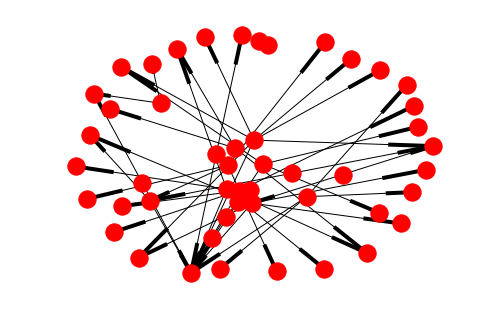

In [34]:
import networkx as nx
%load_ext cypher
%matplotlib inline

results = %cypher MATCH p = ()-[]-() RETURN p

g = results.get_graph()

nx.draw(g)

<IPython.core.display.Javascript object>


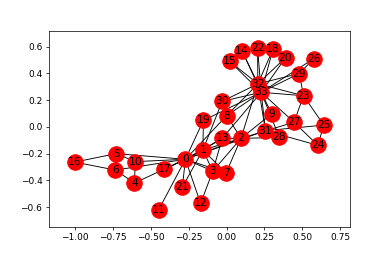

In [29]:
import networkx as nx
from matplotlib import pylab as pl
H = nx.karate_club_graph()
pos = nx.spring_layout(H)  #setting the positions with respect to G, not k.

# H = nx.karate_club_graph()
# pos = nx.spring_layout(my_graph)  #setting the positions with respect to G, not k.


pl.figure()
nx.draw_networkx(H)
# nx.draw_networkx(k, pos=pos)
pl.show()

<IPython.core.display.Javascript object>


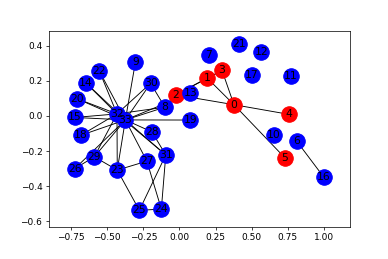

In [24]:
# https://stackoverflow.com/questions/29838746/how-to-draw-subgraph-using-networkx
import networkx as nx
from matplotlib import pylab as pl

G = nx.karate_club_graph()
res = [0,1,2,3,4,5, 'parrot'] #I've added 'parrot', a node that's not in G
                              #just to demonstrate that G.subgraph is okay
                              #with nodes not in G.    
pos = nx.spring_layout(G)  #setting the positions with respect to G, not k.
k = G.subgraph(res)  

pl.figure()
nx.draw_networkx(k, pos=pos)

othersubgraph = G.subgraph(range(6,G.order()))
nx.draw_networkx(othersubgraph, pos=pos, node_color = 'b')
pl.show()

In [1]:
# https://stackoverflow.com/questions/29838746/how-to-draw-subgraph-using-networkx
import networkx as nx
from matplotlib import pylab as pl

# G = nx.karate_club_graph()

# res = [0,1,2,3,4,5, 'parrot'] #I've added 'parrot', a node that's not in G
                              #just to demonstrate that G.subgraph is okay
                              #with nodes not in G.    

G=nx.MultiDiGraph()  
# nx.spring_layout(G)
pos = nx.spring_layout(G)  #setting the positions with respect to G, not k.
k = G.subgraph(res)  

pl.figure()
nx.draw_networkx(k, pos=pos)

othersubgraph = G.subgraph(range(6,G.order()))
nx.draw_networkx(othersubgraph, pos=pos, node_color = 'b')
pl.show()


NameError: name 'res' is not defined

In [9]:
G = nx.karate_club_graph()
type(G)

networkx.classes.graph.Graph

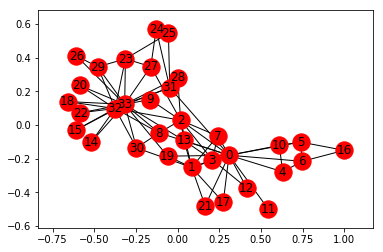

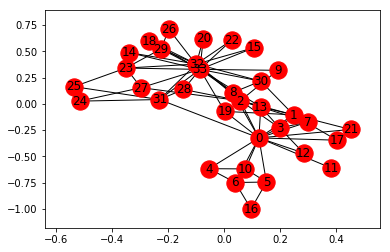

In [13]:
# G=nx.MultiDiGraph()  
G = nx.karate_club_graph()
pl.figure()
nx.draw_networkx(G,with_labels=True)
pl.show()

In [8]:
# https://stackoverflow.com/questions/12894985/make-a-click-able-graph-by-networkx
import networkx as nx 
import matplotlib.pyplot as plt 
import pylab

class AnnoteFinder:  # thanks to http://www.scipy.org/Cookbook/Matplotlib/Interactive_Plotting
    """
    callback for matplotlib to visit a node (display an annotation) when points are clicked on.  The
    point which is closest to the click and within xtol and ytol is identified.
    """
    def __init__(self, xdata, ydata, annotes, axis=None, xtol=None, ytol=None):
        self.data = zip(xdata, ydata, annotes)
        if xtol is None: xtol = ((max(xdata) - min(xdata))/float(len(xdata)))/2
        if ytol is None: ytol = ((max(ydata) - min(ydata))/float(len(ydata)))/2
        self.xtol = xtol
        self.ytol = ytol
        if axis is None: axis = pylab.gca()
        self.axis= axis
        self.drawnAnnotations = {}
        self.links = []

    def __call__(self, event):
        if event.inaxes:
            clickX = event.xdata
            clickY = event.ydata
            if self.axis is None or self.axis==event.inaxes:
                annotes = []
                for x,y,a in self.data:
                    if  clickX-self.xtol < x < clickX+self.xtol and  clickY-self.ytol < y < clickY+self.ytol :
                        dx,dy=x-clickX,y-clickY
                        annotes.append((dx*dx+dy*dy,x,y, a) )
                if annotes:
                    annotes.sort() # to select the nearest node
                    distance, x, y, annote = annotes[0]
                    self.visitNode(annote)

    def visitNode(self, annote): # Visit the selected node
        # do something with the annote value
        print("visitNode", annote)

fig = plt.figure() 
ax = fig.add_subplot(111) 
ax.set_title('select nodes to navigate there')

# G=nx.MultiDiGraph()  # directed graph 
# G = nx.wheel_graph(5)
G = nx.karate_club_graph()

# pos=nx.spring_layout(G) # the layout gives us the nodes position x,y,annotes=[],[],[] for key in pos:
# d=pos[key]
# annotes.append(key)
# x.append(d[0])
# y.append(d[1]) 
# nx.draw(G,pos,font_size=8)

pos=nx.spring_layout(G) # the layout gives us the nodes position x,y,
annotes=[],[],[] 
for key in pos:
    d=pos[key]
    print(key)
    print(d)
#     annotes.append(key)
#     x.append(d[0])
#     y.append(d[1]) 
    nx.draw(G,pos,font_size=8)

af =  AnnoteFinder(x,y, annotes) 
fig.canvas.mpl_connect('button_press_event', af)

plt.show()


0
[ 0.28069438 -0.35870225]
1
[ 0.23891261 -0.14358834]
2
[-0.11042921 -0.06555593]
3
[ 0.09242746 -0.3700358 ]
4
[ 0.49982764 -0.68859225]
5
[ 0.59292677 -0.83089454]
6
[ 0.69230711 -0.72330771]
7
[-0.00808605 -0.37661023]
8
[ 0.02199464  0.1191428 ]
9
[-0.42625988  0.07811761]
10
[ 0.38615859 -0.81275435]
11
[ 0.76471014 -0.41142432]
12
[ 0.10261477 -0.68329346]
13
[ 0.04354099 -0.08379954]
14
[-0.02201898  0.73338214]
15
[ 0.0649059   0.62300084]
16
[ 0.88398269 -1.        ]
17
[ 0.5713428  -0.15144708]
18
[-0.35755891  0.69515243]
19
[ 0.20497615  0.07097666]
20
[-0.2742884   0.79816387]
21
[ 0.53330647 -0.31887736]
22
[-0.14783624  0.76198376]
23
[-0.55493379  0.40210089]
24
[-0.72961856 -0.01799077]
25
[-0.75397579  0.16438195]
26
[-0.59539445  0.74347704]
27
[-0.50836458  0.17172053]
28
[-0.38814192 -0.05178039]
29
[-0.49779289  0.59255681]
30
[ 0.09623754  0.2815079 ]
31
[-0.29467681  0.03942709]
32
[-0.17862793  0.44615434]
33
[-0.22286226  0.36740769]


NameError: name 'x' is not defined

In [42]:
pos

{}